In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("animals")

In [4]:
import os

for root, dirs, files in os.walk('animals'):
    print(f'Found directory: {root}')
    for file in files[:5]:
        print(f'\t{file}')

Found directory: animals
Found directory: animals/animals
Found directory: animals/animals/panda
	panda_00181.jpg
	panda_00361.jpg
	panda_00990.jpg
	panda_00350.jpg
	panda_00607.jpg
Found directory: animals/animals/animals
Found directory: animals/animals/animals/panda
	panda_00181.jpg
	panda_00361.jpg
	panda_00990.jpg
	panda_00350.jpg
	panda_00607.jpg
Found directory: animals/animals/animals/dogs
	dogs_00259.jpg
	dogs_00453.jpg
	dogs_00954.jpg
	dogs_00397.jpg
	dogs_00053.jpg
Found directory: animals/animals/animals/cats
	cats_00597.jpg
	cats_00918.jpg
	cats_00288.jpg
	cats_00167.jpg
	cats_00796.jpg
Found directory: animals/animals/dogs
	dogs_00259.jpg
	dogs_00453.jpg
	dogs_00954.jpg
	dogs_00397.jpg
	dogs_00053.jpg
Found directory: animals/animals/images
	cat.jpg
	dog.jpg
	panda.jpg
Found directory: animals/animals/cats
	cats_00597.jpg
	cats_00918.jpg
	cats_00288.jpg
	cats_00167.jpg
	cats_00796.jpg
Found directory: animals/images
	cat.jpg
	dog.jpg
	panda.jpg


Checking folder: animals/animals/animals/cats


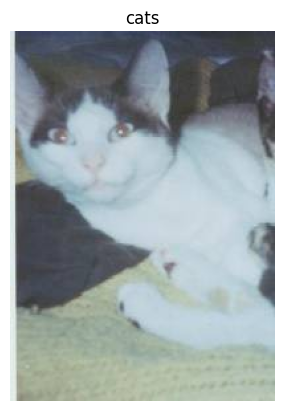

Checking folder: animals/animals/animals/dogs


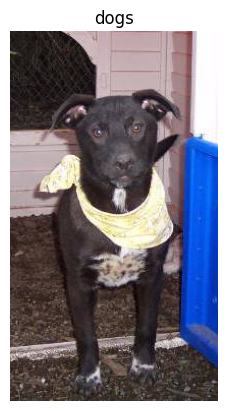

Checking folder: animals/animals/animals/panda


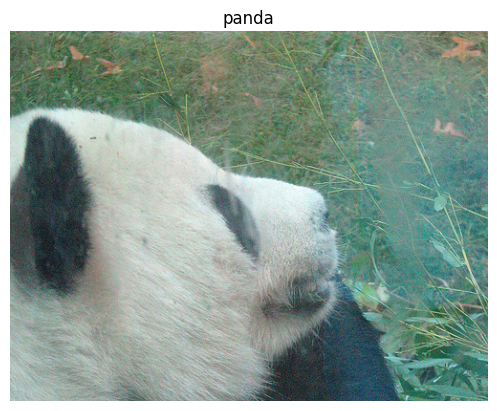

In [5]:
import matplotlib.pyplot as plt
import cv2
import os

classes = ['cats', 'dogs', 'panda']
base_path = 'animals/animals/animals'

for cls in classes:
    folder = os.path.join(base_path, cls)
    print(f'Checking folder: {folder}')
    img_list = os.listdir(folder)
    if img_list:
        img_name = img_list[0]
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
        plt.show()
    else:
        print(f'❗ No images found in {folder}')


3️⃣ Load & Preprocess Images
Load images (3000 total) and convert to grayscale (32x32).

In [6]:
import os
import cv2
import numpy as np

data_dir = 'animals/animals/animals'

classes = ['dogs', 'cats', 'panda']
data = []
labels = []

for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir)[:1000]:
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (32, 32))
        data.append(img_resized.flatten())
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (3000, 1024)
Labels shape: (3000,)


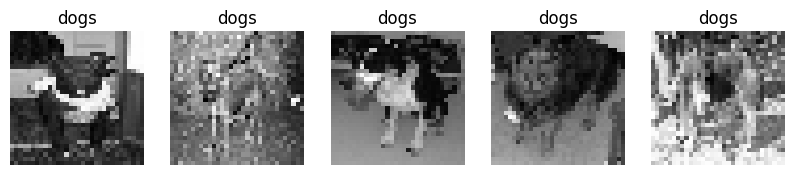

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[i].reshape(32, 32), cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()


In [8]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_values = [15, 20, 25, 30, 35]
results_l1 = []
results_l2 = []

for k in K_values:
    acc_l1 = []
    acc_l2 = []
    for train_idx, val_idx in skf.split(data, labels):
        X_train, X_val = data[train_idx], data[val_idx]
        y_train, y_val = labels[train_idx], labels[val_idx]


        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        pred_l1 = knn_l1.predict(X_val)
        acc_l1.append(accuracy_score(y_val, pred_l1))


        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        pred_l2 = knn_l2.predict(X_val)
        acc_l2.append(accuracy_score(y_val, pred_l2))

    results_l1.append(np.mean(acc_l1))
    results_l2.append(np.mean(acc_l2))
    print(f"K={k}: L1 avg acc={np.mean(acc_l1):.4f}, L2 avg acc={np.mean(acc_l2):.4f}")

K=15: L1 avg acc=0.4703, L2 avg acc=0.4167
K=20: L1 avg acc=0.4713, L2 avg acc=0.4157
K=25: L1 avg acc=0.4747, L2 avg acc=0.4273
K=30: L1 avg acc=0.4753, L2 avg acc=0.4233
K=35: L1 avg acc=0.4720, L2 avg acc=0.4200


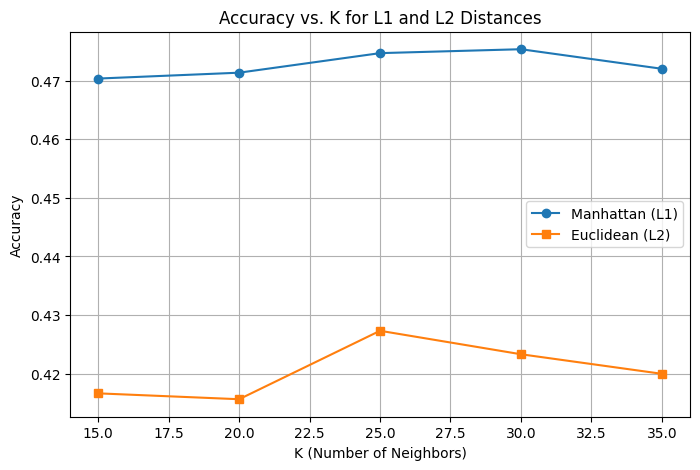

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(K_values, results_l1, marker='o', label='Manhattan (L1)')
plt.plot(K_values, results_l2, marker='s', label='Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for L1 and L2 Distances')
plt.legend()
plt.grid(True)
plt.show()

This study investigates the impact of Manhattan (L1) and Euclidean (L2) distance metrics on the classification accuracy of a k-Nearest Neighbors (k-NN) algorithm applied to grayscale animal images. A 5-fold cross-validation was performed for various values of k (number of neighbors), ranging from 15 to 35. The results demonstrate that the Manhattan distance consistently achieved higher accuracy compared to the Euclidean distance across all evaluated k values. Furthermore, the L1 metric exhibited stable performance, whereas the L2 metric showed a modest peak at k=25 followed by a decline. These findings suggest that the Manhattan distance may offer greater robustness to pixel intensity variations and noise in flattened grayscale image representations. Notably, the study's reliance on raw pixel values and absence of advanced feature extraction techniques highlight important limitations and suggest that future work could benefit from more sophisticated image preprocessing and representation methods

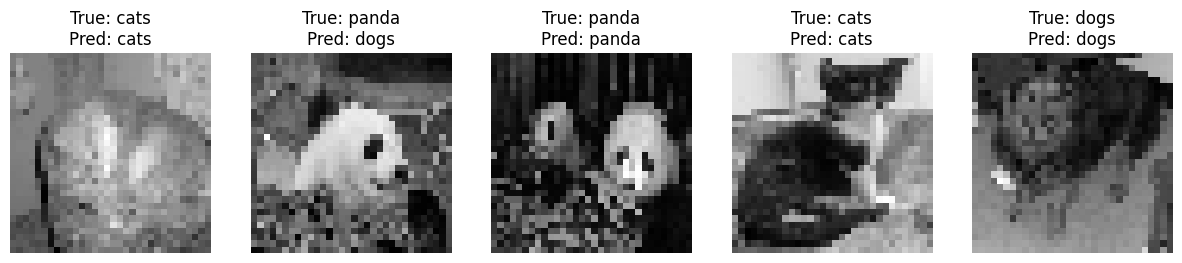

In [12]:
import random

test_idx = random.sample(range(len(data)), 5)
test_images = data[test_idx]
true_labels = labels[test_idx]


best_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
best_knn.fit(data, labels)
preds = best_knn.predict(test_images)


plt.figure(figsize=(15, 3))
for i, idx in enumerate(test_idx):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx].reshape(32, 32), cmap='gray')
    plt.title(f'True: {classes[true_labels[i]]}\nPred: {classes[preds[i]]}')
    plt.axis('off')
plt.show()